In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

print(observations.head())
print(observations.columns)
# Index(['scientific_name', 'park_name', 'observations'], dtype='object')
print(species.head())
print(species.columns)
# Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

#convert nan to No Intervention
species["conservation_status"].fillna("No Intervention", inplace = True)
print(species["conservation_status"].unique())

print(f"observations shape: {observations.shape}")
print(f"species shape: {species.shape}")

# all_data = observations.join(species.set_index("scientific_name"), on="scientific_name")
# print(all_data.head())
# print(all_data.columns)
# Index(['scientific_name', 'park_name', 'observations', 'category', 'common_names', 'conservation_status']

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Index(['scientific_name', 'park_name', 'observations'], dtype='object')
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              Am

In [116]:
'''
Questions to answer
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?
Questions:
-How many species are there?
-Are there clusters or types of those species to group them?
-Is there a major type of endangerment for those overarching clusters?
-What types of endangered are there? [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
-Is there a generic action to take for each largest represented species in each endangered category?

Figures:
-Bar chart of each species for each type of endangerment

'''

"\nQuestions to answer\n- What is the distribution of conservation status for species?\n- Are certain types of species more likely to be endangered?\n- Are the differences between species and their conservation status significant?\n- Which animal is most prevalent and what is their distribution amongst parks?\nQuestions:\n-How many species are there?\n-Are there clusters or types of those species to group them?\n-Is there a major type of endangerment for those overarching clusters?\n-What types of endangered are there? [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']\n-Is there a generic action to take for each largest represented species in each endangered category?\n\nFigures:\n-Bar chart of each species for each type of endangerment\n\n"

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


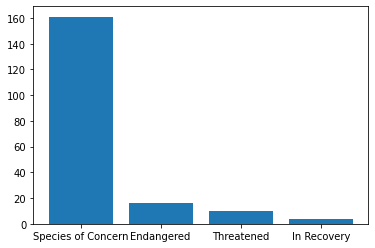

unique species categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
number of observations total in parks: 3314739


<Figure size 432x288 with 0 Axes>

In [117]:
#endangered species count overall
endangered = species[species.conservation_status != "No Intervention"]
print(endangered["conservation_status"].value_counts())
status_labels = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
plt.bar(status_labels, endangered["conservation_status"].value_counts())
plt.show()
plt.clf()

print(f"unique species categories: {species.category.unique()}")
print(f"unique parks: {observations.park_name.unique()}")
print(f"number of observations total in parks: {observations.observations.sum()}")



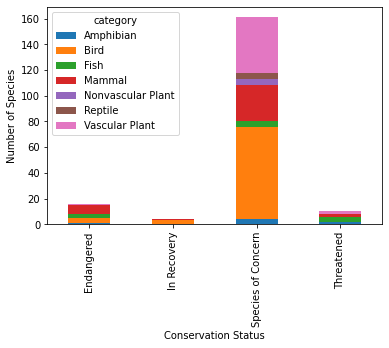

In [118]:
endangered = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])["scientific_name"]\
    .count()\
    .unstack()

ax = endangered.plot(kind="bar", stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()

In [119]:
species["is_protected"] = species.conservation_status != "No Intervention"

category_counts = species.groupby(["category", "is_protected"])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns="is_protected",
              index="category",
              values="scientific_name")\
    .reset_index()
category_counts.columns = ["category", "not_protected", "protected"]

print(category_counts)
print(type(category_counts) is pd.DataFrame)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46
True


In [120]:
#make counts into relative percents
category_counts["percent_protected"] = 100 * (category_counts.protected/ \
                                    (category_counts.protected + category_counts.not_protected))
print(category_counts)
# Note Mammal 17%, Bird 15%, Amphibian/Fish around 8% each, Reptile at 6%


            category  not_protected  protected  percent_protected
0          Amphibian             72          7           8.860759
1               Bird            413         75          15.368852
2               Fish            115         11           8.730159
3             Mammal            146         30          17.045455
4  Nonvascular Plant            328          5           1.501502
5            Reptile             73          5           6.410256
6     Vascular Plant           4216         46           1.079305


In [121]:
#Are mammal and bird protection rates as similar as they appear?
from scipy.stats import chi2_contingency

contingency1 = [[75, 413],
               [30, 146]]
print(chi2_contingency(contingency1))
#p value is 0.69 so fail to reject null hypothesis they are significantly different

(0.16170148316545574, 0.6875948096661336, 1, array([[ 77.1686747, 410.8313253],
       [ 27.8313253, 148.1686747]]))


In [122]:
#Are mammal and amphibian protection rates as similar as they appear?
from scipy.stats import chi2_contingency

contingency2 = [[7, 72],
               [30, 146]]
print(chi2_contingency(contingency2))
#p value is 0.13 so fail to reject null hypothesis they are significantly different

(2.321746712946015, 0.12757669693198975, 1, array([[ 11.4627451,  67.5372549],
       [ 25.5372549, 150.4627451]]))
